 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [87]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [88]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [89]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON &amp; CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [90]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON &amp; CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [91]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [92]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [93]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [94]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [95]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [96]:
# Fix Data Types
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [97]:
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [98]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [99]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns.isnull()
sp500_daily_returns.dropna()
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [100]:
# Rename Column
# YOUR CODE HERE
sp500_df = sp500_daily_returns.rename(columns={"Close":"S&P 500"}, inplace =True)
sp500_daily_returns.head()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [101]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_daily_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")

combined_daily_returns.sort_index(inplace=True)

combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

&lt;matplotlib.axes._subplots.AxesSubplot at 0x24929c00248&gt;

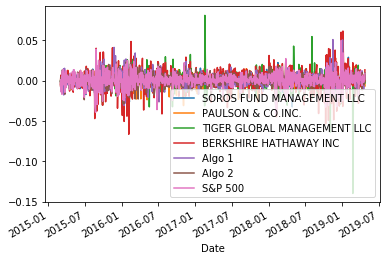

In [102]:
# Plot daily returns
# YOUR CODE HERE
combined_daily_returns.plot()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2492c777c08&gt;

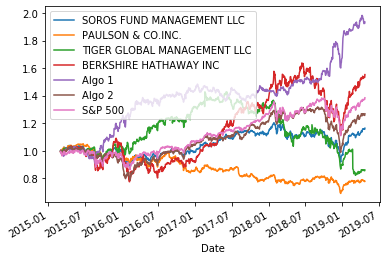

In [103]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_daily_returns).cumprod()
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2492c565b88&gt;

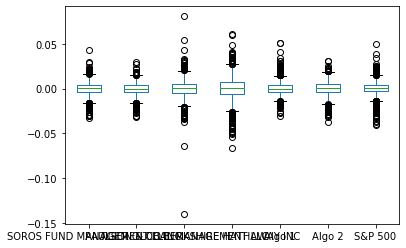

In [104]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_daily_returns.plot.box()

In [105]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_daily_returns.std()
daily_std


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON &amp; CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&amp;P 500                        0.008554
dtype: float64

In [106]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
risky = daily_std > .008554
print(risky)

SOROS FUND MANAGEMENT LLC      False
PAULSON &amp; CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&amp;P 500                        False
dtype: bool


In [107]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON &amp; CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&amp;P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2492c8e7508&gt;

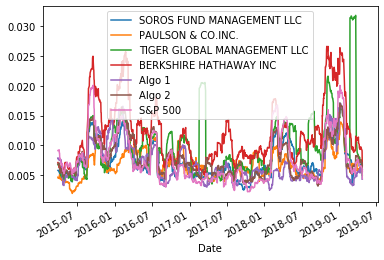

In [108]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined_daily_returns.rolling(window=21).std().plot()


In [109]:
# Construct a correlation table
# YOUR CODE HERE
combined_daily_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [110]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = combined_daily_returns["BERKSHIRE HATHAWAY INC"].cov(combined_daily_returns["S&P 500"])

variance = combined_daily_returns["BERKSHIRE HATHAWAY INC"].var()

brka_beta = covariance / variance

brka_beta

0.4975013478956255

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2492cac4608&gt;

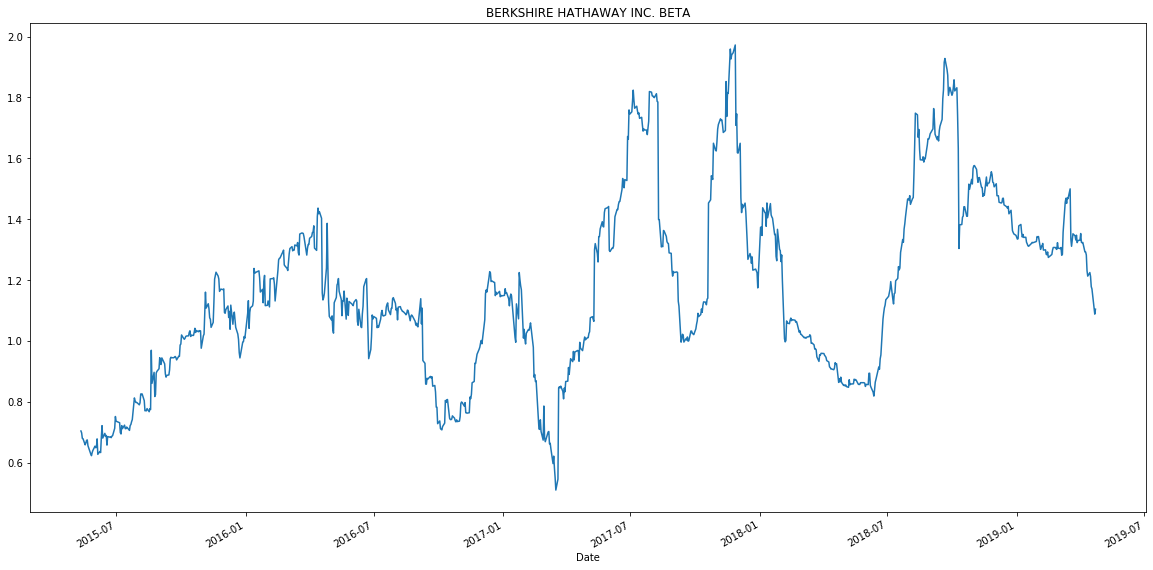

In [111]:
rolling_covariance = combined_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=50).cov(combined_daily_returns["S&P 500"])

rolling_variance = combined_daily_returns["S&P 500"].rolling(window=50).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC. BETA")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x2492ff6ee48&gt;

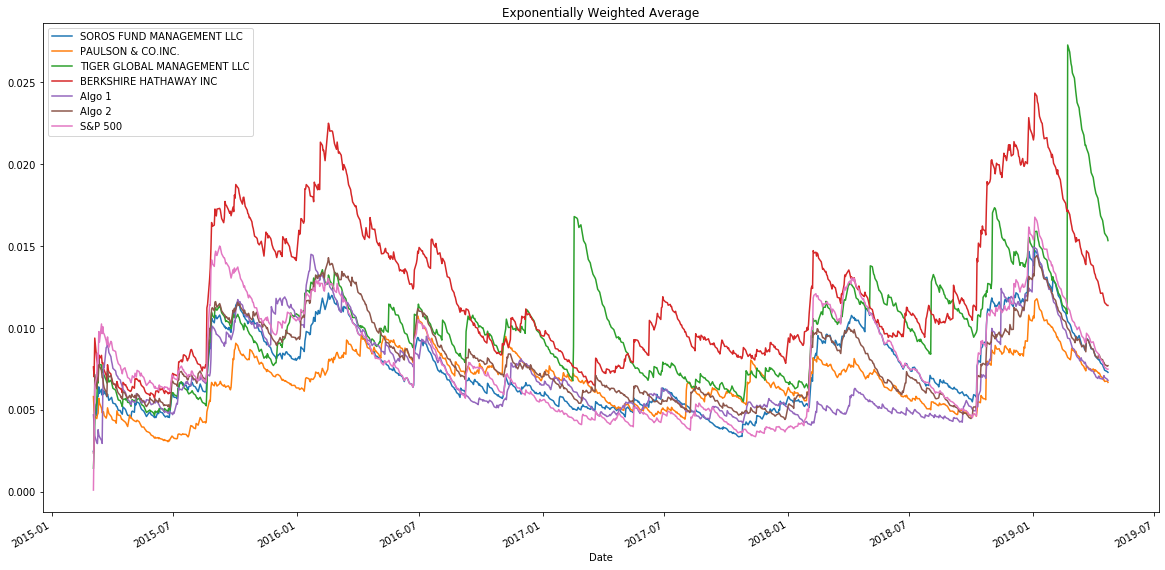

In [119]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
combined_daily_returns.ewm(halflife= 21).std().plot(figsize = (20,10), title = "Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [120]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_daily_returns.mean() * 252) / (combined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON &amp; CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&amp;P 500                        0.648267
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x249315d01c8&gt;

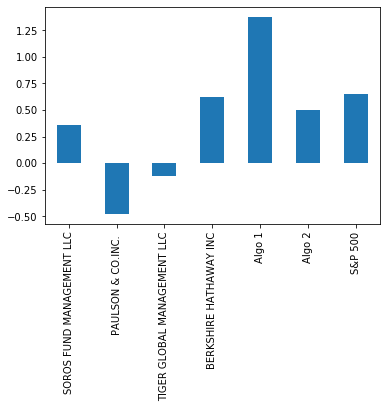

In [121]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 

Algo 1 does outperform both 'the market' and the whales. However, Algo 2 fails to outperform the market, and BERKSHIRE HATHAWAY INC.


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [122]:
# Read the first stock
# YOUR CODE HERE
jpm_prices_csv = Path("Resources/jpm.csv")
jpm_df = pd.read_csv(jpm_prices_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)
jpm_df.head()

jpm_df.rename(columns={"Close":"JPM"}, inplace =True)
jpm_df.head()

,JPM
Date,
2018-02-02,114.28
2018-02-05,108.80
2018-02-06,112.11
2018-02-07,112.87
2018-02-08,107.88


In [123]:
# Read the second stock
# YOUR CODE HERE
marriott_prices_csv = Path("Resources/marriott.csv")
marriott_df = pd.read_csv(marriott_prices_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)

marriott_df.rename(columns={"Close":"MAR"}, inplace=True)
marriott_df.head()

,MAR
Date,
2018-02-02,141.17
2018-02-05,136.34
2018-02-06,140.03
2018-02-07,139.64
2018-02-08,133.88


In [124]:
# Read the third stock
# YOUR CODE HERE
disney_prices_csv = Path("Resources/disney.csv")
disney_df = pd.read_csv(disney_prices_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)

disney_df.rename(columns={"Close":"DIS"}, inplace=True)
disney_df.head()

,DIS
Date,
2018-02-02,108.70
2018-02-05,104.70
2018-02-06,106.17
2018-02-07,104.76
2018-02-08,101.35


In [125]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_return_prices = pd.concat([jpm_df, marriott_df, disney_df], axis="columns", join="inner")

custom_return_prices.sort_index(inplace=True)
custom_return_prices.head()



,JPM,MAR,DIS
Date,,,
2018-02-02,114.28,141.17,108.70
2018-02-05,108.80,136.34,104.70
2018-02-06,112.11,140.03,106.17
2018-02-07,112.87,139.64,104.76
2018-02-08,107.88,133.88,101.35


In [126]:
# Reset the index
# YOUR CODE HERE
custom_return_prices.reset_index()


,Date,JPM,MAR,DIS
0,2018-02-02,114.28,141.17,108.70
1,2018-02-05,108.80,136.34,104.70
2,2018-02-06,112.11,140.03,106.17
3,2018-02-07,112.87,139.64,104.76
4,2018-02-08,107.88,133.88,101.35
...,...,...,...,...
246,2019-01-28,103.88,110.53,110.81
247,2019-01-29,104.17,111.12,110.90
248,2019-01-30,104.41,113.64,110.13
249,2019-01-31,103.50,114.53,111.52


In [127]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
custom_return_prices.head()

,JPM,MAR,DIS
Date,,,
2018-02-02,114.28,141.17,108.70
2018-02-05,108.80,136.34,104.70
2018-02-06,112.11,140.03,106.17
2018-02-07,112.87,139.64,104.76
2018-02-08,107.88,133.88,101.35


In [128]:
# Drop Nulls
# YOUR CODE HERE

custom_return_prices.dropna()
custom_return_prices.head()

,JPM,MAR,DIS
Date,,,
2018-02-02,114.28,141.17,108.70
2018-02-05,108.80,136.34,104.70
2018-02-06,112.11,140.03,106.17
2018-02-07,112.87,139.64,104.76
2018-02-08,107.88,133.88,101.35


### Changed the prices to daily return changes for all three stocks.

In [129]:
returns = custom_return_prices.pct_change()
returns.head()

,JPM,MAR,DIS
Date,,,
2018-02-02,NaN,NaN,NaN
2018-02-05,-0.047952,-0.034214,-0.036799
2018-02-06,0.030423,0.027065,0.014040
2018-02-07,0.006779,-0.002785,-0.013281
2018-02-08,-0.044210,-0.041249,-0.032551


In [130]:
returns = returns.dropna()
returns.head()

,JPM,MAR,DIS
Date,,,
2018-02-05,-0.047952,-0.034214,-0.036799
2018-02-06,0.030423,0.027065,0.014040
2018-02-07,0.006779,-0.002785,-0.013281
2018-02-08,-0.044210,-0.041249,-0.032551
2018-02-09,0.020022,0.018001,0.017168


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [131]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = returns.dot(weights)

portfolio_returns.head()


Date
2018-02-05   -0.039655
2018-02-06    0.023843
2018-02-07   -0.003096
2018-02-08   -0.039337
2018-02-09    0.018397
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [132]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_portfolios = pd.concat([combined_daily_returns, portfolio_returns], axis="columns", join="inner")
all_portfolios.sort_index(inplace=True)

all_portfolios.rename(columns={"0":"Custom"}, inplace=True)
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
Date,,,,,,,,
2018-02-05,-0.025794,-0.021300,-0.037126,-0.033011,-0.001723,-0.031101,-0.040979,-0.039655
2018-02-06,0.001447,0.007533,0.007571,0.017441,0.007653,0.009903,0.017441,0.023843
2018-02-07,-0.001689,0.002048,-0.007242,-0.005467,-0.001485,0.001598,-0.005002,-0.003096
2018-02-08,-0.026591,-0.023493,-0.029651,-0.044806,-0.005913,-0.025095,-0.037536,-0.039337
2018-02-09,-0.003158,-0.000997,0.001107,0.008973,-0.003011,0.000756,0.014936,0.018397


In [133]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_portfolios = all_portfolios.dropna()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [134]:
# Risk
# YOUR CODE HERE
daily_standard_dev = all_portfolios.std()
daily_standard_dev

SOROS FUND MANAGEMENT LLC      0.010443
PAULSON &amp; CO.INC.              0.007779
TIGER GLOBAL MANAGEMENT LLC    0.012761
BERKSHIRE HATHAWAY INC         0.015863
Algo 1                         0.008402
Algo 2                         0.009318
S&amp;P 500                        0.011093
0                              0.012121
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x249318d8948&gt;

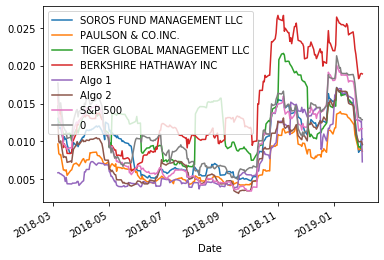

In [135]:
# Rolling
# YOUR CODE HERE
all_portfolios.rolling(window=21).std().plot()

In [136]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
port_sharpe_ratio = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
port_sharpe_ratio

SOROS FUND MANAGEMENT LLC     -0.346177
PAULSON &amp; CO.INC.             -0.133914
TIGER GLOBAL MANAGEMENT LLC   -1.277393
BERKSHIRE HATHAWAY INC        -0.180430
Algo 1                         2.220526
Algo 2                        -0.365896
S&amp;P 500                       -0.028456
0                             -0.347003
dtype: float64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x249319755c8&gt;

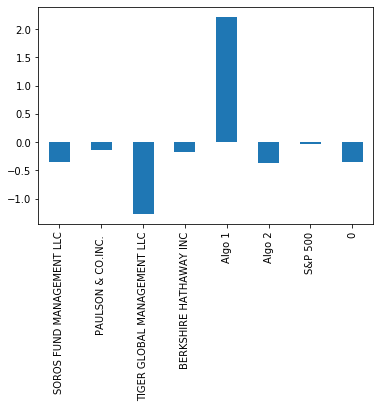

In [137]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
port_sharpe_ratio.plot.bar()

In [138]:
# Create a correlation analysis
# YOUR CODE HERE
all_portfolios.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.804402,0.637764,0.811263,0.367109,0.858359,0.856789,0.774410
PAULSON & CO.INC.,0.804402,1.000000,0.683134,0.705521,0.394184,0.834248,0.818832,0.698541
TIGER GLOBAL MANAGEMENT LLC,0.637764,0.683134,1.000000,0.534775,0.196897,0.640650,0.709497,0.619844
BERKSHIRE HATHAWAY INC,0.811263,0.705521,0.534775,1.000000,0.352160,0.815588,0.851976,0.758634
Algo 1,0.367109,0.394184,0.196897,0.352160,1.000000,0.399836,0.307069,0.340140
Algo 2,0.858359,0.834248,0.640650,0.815588,0.399836,1.000000,0.892875,0.776986
S&P 500,0.856789,0.818832,0.709497,0.851976,0.307069,0.892875,1.000000,0.869537
0,0.774410,0.698541,0.619844,0.758634,0.340140,0.776986,0.869537,1.000000


In [139]:
# Beta
# YOUR CODE HERE
covariance_custom = all_portfolios["0"].cov(all_portfolios["S&P 500"])

variance_custom = all_portfolios["0"].var()

custom_beta = covariance_custom / variance_custom

custom_beta

KeyError: &#39;0&#39;

#Financial Analysis

### Performance Analysis
The only two portfolios that outperformed the S&P 500 were Algo 1 and BERKSHIRE HATHAWAY INC.

### Risk Analysis
When doing the Risk Analysis, the box plot showed that the box with the largest spread is BERKSHIRE HATHAWAY INC and the box with the shortest spread is S&P 500.

The analysis also showed that the portfolios that are riskier than the S&P 500 are TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC.

### Rolling Statistics



### Sharpe Ratios
The Algo 1 strategy outperforms both the S&P 500 and the whales portfolio.

The Algo 2 strategy only outperforms SOROS FUND MANAGEMENT, PAULSON & CO.INC, and TIGER GLOBAL MANAGEMENT LLC. However, it does not outperform the S&P 500 or BERKSHIRE HATHAWAY INC.

### Custom Portfolio of 3 stocks (JPM, DIS, MAR)

When using Sharpe Ratios it was evident that my three stock portfolio did not do well when compare to the rest. Only Algo 2 and TIGER GLOBAL MANAGEMENT INC had a lower Sharpe Ratio.

It also showed a strong correlation with the S&P 500. The custom portfolio was comprised of three large, strong companies that move closely with the market. However, it has a higher Standard Deviation, which could mean that it has both a higher risk, but also a higher potential for profit.




    



